# Log Likelihood 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import corner
from scipy.optimize import minimize
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = np.genfromtxt("data_line.txt", delimiter = ",",names = True)

In [3]:
def fun(pars,x):
    m,c = pars
    return m*x+c

In [4]:
def chisq(pars,data):
    """
    Generatedds the chi square values for the the given data and theoretical model.
    
    Parameters
    ----------
    
    pars : list, array
        This array or list includes the parameters m and c for straight line.m is slope and c is intercept.
        
    data : list, array
        This list must contain x, y and sigma.
    Returns
    -------
    
    chisqs : Array
        List of Chi Square values obtained from data theoretical model
    """
    dy = fun(pars,data['x']) - data['y']
    #k = np.argmin(chi**2)
    return np.sum(dy**2/data['sigma']**2)
    

In [5]:
import itertools
m1 = np.linspace(0, 1,100)
c1 = np.linspace(0, 5,100)
#for i,j in itertools.combinations(m,c):
    #parm = chisq([m,c], data)
arr = []
for i in itertools.product(m1,c1):
    param = chisq([i[0],i[1]],data)
    arr.append([i[0],i[1],param])
    

In [6]:
k = np.array(arr)
min_ = np.argmin(k[:,2])
k[min_]

array([5.35353535e-01, 3.88888889e+00, 3.43990282e+03])

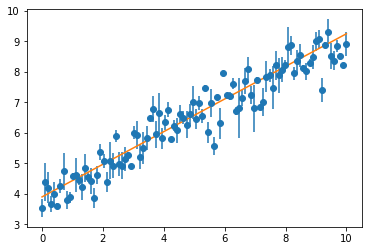

In [7]:
plt.errorbar(data['x'],data['y'],data['sigma'], marker = 'o',linestyle='none' )
plt.plot(data['x'], k[min_,0]*data['x']+k[min_,1])

In [9]:
len(data[0])

3

In [13]:
def LogLhood(pars, data):
    m, c = pars
    LL  = lambda m,c: - len(data)/2 * np.log(2*np.pi) - (1/2)*np.sum(np.log(data['sigma']**2)+chisq([m,c],data))
    params = np.zeros(shape=(10000,3))
    for i in range(10000):
        m_temp = np.random.normal(m, 0.01)
        c_temp = np.random.normal(c, 0.01)
        u = np.random.uniform(0,1)
        if LL(m_temp, c_temp)>LL(m,c):
            m = m_temp
            c = c_temp
        elif LL(m_temp,c_temp) - LL(m,c)>np.log10(u):
            m = m_temp
            c = c_temp
        params[i,:] = np.asarray([m,c,LL(m,c)])
    return params

In [14]:
LL = LogLhood([2,3],data)

In [15]:
len(LL[0])

3

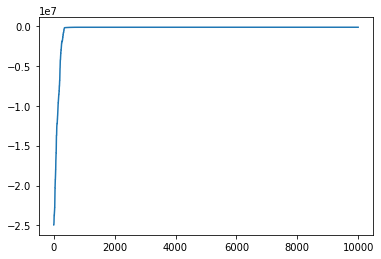

In [16]:
plt.plot(LL[:,2])

In [17]:
left = LL[2000:]

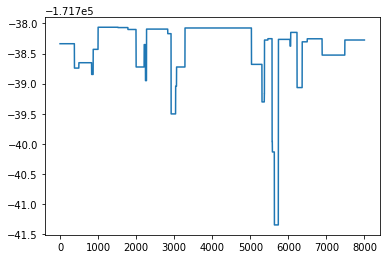

In [18]:
plt.plot(left[:,2])

In [19]:
import seaborn as sns

<AxesSubplot:ylabel='Density'>

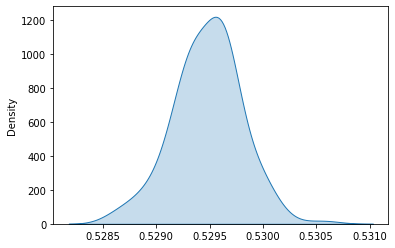

In [20]:
sns.kdeplot(left[:,0] , bw = 0.5 , fill = True)

In [21]:
left[:,1]

array([3.93882971, 3.93882971, 3.93882971, ..., 3.93725766, 3.93725766,
       3.93725766])